In [1]:
 !pip install python-binance pandas mplfinance
!pip install plotly
!pip install yfinance


zsh:1: /Users/ayushshekhar/Desktop/ML/DL/ml-env/bin/pip: bad interpreter: /Users/ayushshekhar/Desktop/ML/ml-env/bin/python3.11: no such file or directory
zsh:1: /Users/ayushshekhar/Desktop/ML/DL/ml-env/bin/pip: bad interpreter: /Users/ayushshekhar/Desktop/ML/ml-env/bin/python3.11: no such file or directory
zsh:1: /Users/ayushshekhar/Desktop/ML/DL/ml-env/bin/pip: bad interpreter: /Users/ayushshekhar/Desktop/ML/ml-env/bin/python3.11: no such file or directory


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.graph_objs as go
from datetime import datetime


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
import yfinance as yf

ImportError: cannot import name 'check_ansix923_padding' from 'cryptography.hazmat.bindings._rust' (unknown location)

In [3]:
data = yf.download(tickers='BTC-USD', period = '365d', interval = '1d')
data = data.reset_index()



[*********************100%***********************]  1 of 1 completed


In [4]:
fig = go.Figure()

#Candlestick
fig.add_trace(go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'], name = 'market data'))

In [5]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))

In [6]:
print(data)

          Date          Open          High           Low     Close  \
0   2022-08-24  21526.455078  21783.076172  21195.005859  0.357436   
1   2022-08-25  21395.458984  21789.636719  21362.441406  0.370559   
2   2022-08-26  21596.085938  21804.908203  20199.482422  0.285092   
3   2022-08-27  20262.480469  20340.775391  19890.523438  0.271178   
4   2022-08-28  20041.035156  20139.054688  19616.814453  0.244094   
..         ...           ...           ...           ...       ...   
360 2023-08-19  26047.832031  26249.449219  25802.408203  0.657089   
361 2023-08-20  26096.861328  26260.681641  26004.314453  0.663041   
362 2023-08-21  26188.691406  26220.201172  25846.087891  0.658870   
363 2023-08-22  26130.748047  26135.507812  25520.728516  0.652975   
364 2023-08-23  26083.507812  26143.343750  25970.394531  0.652502   

        Adj Close       Volume  
0    21395.019531  31962253368  
1    21600.904297  31028679593  
2    20260.019531  42326789564  
3    20041.738281  30116729

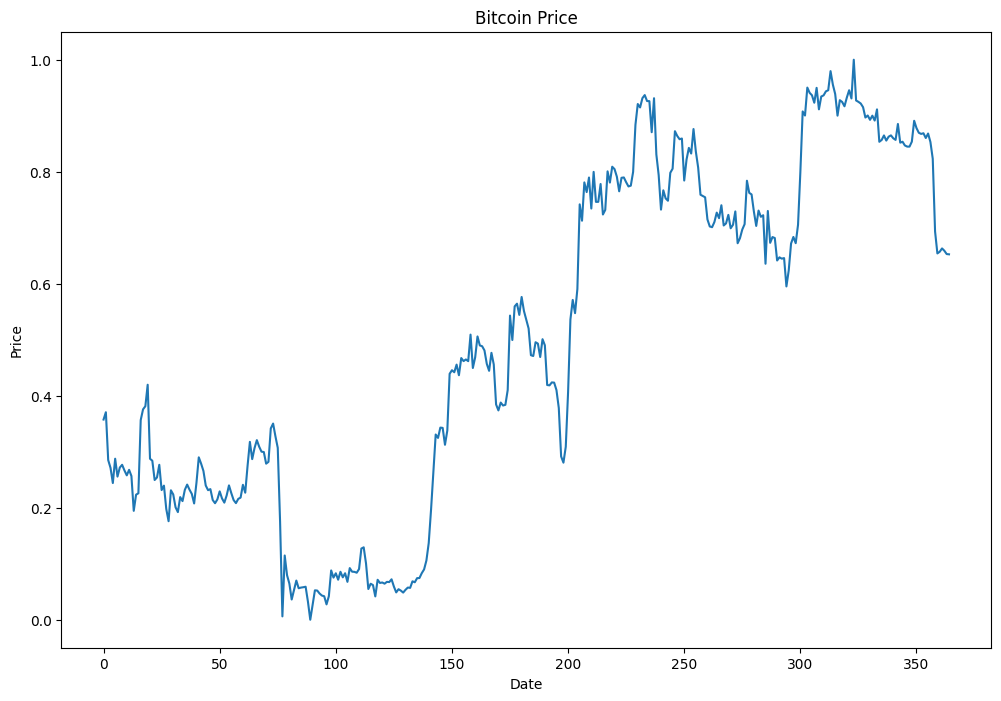

In [7]:
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
y = data['Close']
X = data.drop(['Date', 'Close'], axis=1)
 # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Check the shape of the datasets
print(y_train)

295    0.623957
63     0.317626
241    0.766805
306    0.923199
317    0.927733
         ...   
323    1.000000
192    0.418520
117    0.041584
47     0.213796
172    0.382498
Name: Close, Length: 292, dtype: float64


**using a linear regeression model to predict**

In [10]:
from sklearn.linear_model import LinearRegression

# Create a linear regression object
lr = LinearRegression()

# Train the model on the training set
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)
# print(y_pred)

# Evaluate the model's performance
from sklearn.metrics import  accuracy_score 
# print(y_test)
y_pred_binary = np.where(y_pred > y_test, 1, 0)

# Convert the actual values to binary labels
y_test_binary = np.where(y_test > y_test.shift(1), 1, 0)

# Calculate the accuracy score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy score: ", accuracy)



Accuracy score:  0.5616438356164384


In [11]:
n = len(X_train)
sample_weights = np.ones(n)
sample_weights[-100:] = 2.0  # set higher weights for the last 100 data points

rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train, sample_weight=sample_weights)

RandomForestRegressor(random_state=0)

In [12]:
accuracy = rf.score(X_test, y_test) * 100
print('Accuracy:', accuracy, '%')

Accuracy: 99.95811474973242 %


In [13]:
predictions = rf.predict(X_test)
print(predictions)


[0.08837713 0.75139429 0.2326315  0.23833625 0.10481766 0.84433243
 0.02732591 0.94566926 0.80144577 0.25676515 0.06666854 0.17419308
 0.70691788 0.72701307 0.70234727 0.73162255 0.62223937 0.07183131
 0.79045006 0.11875164 0.26357553 0.30620174 0.21709522 0.64630585
 0.90121908 0.87310257 0.29860169 0.89262375 0.10945928 0.43110806
 0.07088827 0.08558654 0.2249015  0.23235594 0.24065699 0.28522531
 0.24101452 0.05787831 0.7286533  0.28719509 0.71368294 0.95361961
 0.75055021 0.71827579 0.29467956 0.94002442 0.74934164 0.78027479
 0.73508939 0.3038083  0.3838276  0.8083047  0.92609289 0.48072601
 0.05326858 0.22595168 0.20832478 0.07334892 0.02429075 0.16631974
 0.92265594 0.70197335 0.27170835 0.08407182 0.91376216 0.88459193
 0.21346484 0.06703972 0.80241069 0.44802116 0.3323082  0.37860389
 0.05637819]
